<a href="https://colab.research.google.com/github/forcoding1/Deep-Learning-with-tensorflow/blob/main/05_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-02-05 12:29:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-05 12:29:27 (104 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2023-02-05 12:29:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 2a00:1450:4013:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M  35.0MB/s    in 5.1s    

2023-02-05 12:29:33 (31.6 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
img_s = (224,224)
batch_s = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size = img_s,
    label_mode = "categorical",
    batch_size = batch_s
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size = img_s,
    label_mode = "categorical",
    batch_size = batch_s
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[155.64285    155.64285    131.64285   ]
   [159.16837    159.16837    135.16837   ]
   [159.7143     159.7143     135.7143    ]
   ...
   [  1.           0.          31.        ]
   [  1.           0.          31.        ]
   [  1.           0.          31.        ]]

  [[155.52042    152.52551    131.85713   ]
   [156.34694    154.14796    133.2143    ]
   [157.68367    155.08675    134.2551    ]
   ...
   [  1.           0.          31.        ]
   [  1.           0.          31.        ]
   [  1.           0.          31.        ]]

  [[142.         134.57143    117.21429   ]
   [146.94388    139.5153     122.158165  ]
   [153.61734    146.18878    128.83163   ]
   ...
   [  1.           0.          31.        ]
   [  1.           0.          31.        ]
   [  1.           0.          31.        ]]

  ...

  [[ 61.           1.          27.        ]
   [ 63.699005     0.7449168   27.729612  ]
   [ 67.64286      1.          28.214287  ]
   ...
   [ 87.61738     81.974

sequential api runs layers in sequential order.
Functional api allows our model to have more flexibility

In [ ]:
 base_model = tf.keras.applications.EfficientNetB0(include_top=False)

 base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224, 3), name = "input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avg_pool")(x)
print(f"Shape after Global_avg_pool2d: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

model_00 = tf.keras.Model(inputs, outputs)

Shape after base_model: (None, 7, 7, 1280)
Shape after Global_avg_pool2d: (None, 1280)


In [ ]:
# from tensorflow.python.framework.ops import Tensor
# model_00.compile(
#     loss = "categorical_crossentropy",
#     optimizer = tf.keras.optimizers.Adam(),
#     metrics = "accuracy"
# )

# history = model_00.fit(
#     train_data,
#     epochs = 5,
#     steps_per_epoch = len(train_data),
#     validation_data = test_data,
#     validation_steps = int(0.25*len(test_data)),
#     callbacks = [create_tensorboard_callback("Transfer_Learning", "10_percent_fe_efnet")]
# )

In [ ]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num , layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
inp_sh = (1,4,4,3)

tf.random.set_seed(8)
input_tensor = tf.random.normal(shape = inp_sh)

global_avgpool = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"{input_tensor}\n{global_avgpool}")
print(f"input_shape: {input_tensor.shape}\n global_avg_pooling_shape: {global_avgpool.shape}\n")

[[[[ 1.2074401  -0.7452463   0.6908678 ]
   [-0.7635988  -2.4725451   0.583414  ]
   [ 0.27248892 -0.4530873   0.59562457]
   [-0.85969234 -1.4462645   0.3808334 ]]

  [[-0.0147899  -0.58704364 -0.73273367]
   [ 0.57390994 -1.2755575  -1.7876909 ]
   [ 0.971704    1.2690817   0.79668885]
   [ 0.81820124  0.45228273  0.42721364]]

  [[ 0.33444843 -1.2464387  -0.01838202]
   [-1.3986979  -1.7835697  -1.5526508 ]
   [ 0.8596758   0.12363411 -0.51423204]
   [-0.12649536 -0.6888031  -1.1992131 ]]

  [[ 0.99946725 -0.3370511   1.4751912 ]
   [ 0.6965998   1.8013563  -0.46761826]
   [ 0.5729726   0.43847594 -0.520363  ]
   [ 0.41035894  0.04535478 -0.829893  ]]]]
[[ 0.28462452 -0.43158883 -0.16705896]]
input_shape: (1, 4, 4, 3)
 global_avg_pooling_shape: (1, 3)



In [ ]:
tf.reduce_mean(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.28462452, -0.43158883, -0.16705896]], dtype=float32)>

In [ ]:
global_maxpool = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
global_maxpool

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.2074401, 1.8013563, 1.4751912]], dtype=float32)>

In [ ]:
global_maxpool.shape

TensorShape([1, 3])

In [ ]:
# plot_loss_curves(history)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-02-05 12:29:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 2a00:1450:4013:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  28.9MB/s    in 5.1s    

2023-02-05 12:29:50 (25.1 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
train_dir_1p = "10_food_classes_1_percent/train/"
test_dir_1p = "10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [ ]:
train_data_1p = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1p,
    image_size = img_s,
    label_mode = "categorical",
    batch_size = batch_s
)

test_data_1p = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1p,
    image_size = img_s,
    label_mode = "categorical",
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augment = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
], name = "data_augmentation")

10_food_classes_10_percent/train/pizza/448519.jpg


(-0.5, 426.5, 585.5, -0.5)

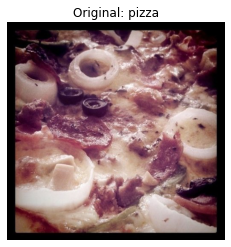

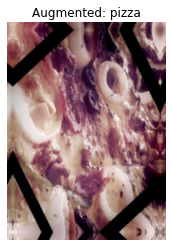

In [ ]:
import matplotlib.pyplot as plt
import os 
import matplotlib.image as mping
import random

rand_class = random.choice(train_data_1p.class_names)
rand_dir = train_dir + rand_class
rand_img = random.choice(os.listdir(rand_dir))

rand_path = rand_dir + "/" + rand_img

print(rand_path)

img = mping.imread(rand_path)
plt.imshow(img)
plt.title(f"Original: {rand_class}")
plt.axis(False)

plt.figure()
augmented_img = data_augment(tf.expand_dims(img, axis=0), training=True)
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented: {rand_class}")
plt.axis(False)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

if it is a single layer then we add x after the layer like this AvgPool()(x) and if its a whole model then we pass it inside the function call like this base_model(x).

In [ ]:
# from tensorflow.keras import layers

# input_shape = (224, 224, 3)
# base_model = tf.keras.applications.EfficientNetB0(include_top = False)
# base_model.trainable = False

# inputs = layers.Input(shape=input_shape, name = "input_layer")

# x = data_augment(inputs)

# x = base_model(x, training=False)

# x = tf.keras.layers.GlobalAveragePooling2D(name = "Pooling_layer")(x)

# outputs = tf.keras.layers.Dense(10, activation = "softmax", name="output_layer")(x)

# model_01 = tf.keras.Model(inputs, outputs)

# model_01.compile(
#     loss = "categorical_crossentropy",
#     optimizer = tf.keras.optimizers.Adam(),
#     metrics = ["accuracy"]
# )

# history_01 = model_01.fit(
#     train_data_1p,
#     epochs = 10,
#     steps_per_epoch = len(train_data_1p),
#     validation_data = test_data_1p,
#     validation_steps = int(0.25* len(test_data)),
#      callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")]
# )

In [ ]:
# # Evaluate on the test data
# results_1_percent_data_aug = model_01.evaluate(test_data_1p)
# results_1_percent_data_aug

In [ ]:
# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

--2023-02-05 12:29:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 2a00:1450:4013:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M  33.8MB/s    in 5.2s    

2023-02-05 12:29:58 (31.1 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [ ]:
img_s

(224, 224)

In [ ]:
train_data_10p = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    image_size = img_s,
    label_mode = "categorical"
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size = img_s,
    label_mode = "categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape)
x = data_augment(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model_02 = tf.keras.Model(inputs, outputs)

model_02.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
model_02.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
checkpoint_path  = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = False,
    frequency = "epoch" ,
    verbose = 1
)

In [ ]:
history_02 = model_02.fit(
    train_data_10p,
    epochs = 5,
    steps_per_epoch = len(train_data_10p),
    validation_data = test_data,
    validation_steps = int(0.25* len(test_data)),
     callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230205-123002
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9392 - accuracy: 0.3573
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 623ms/step - loss: 1.9392 - accuracy: 0.3573 - val_loss: 1.3861 - val_accuracy: 0.6842
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2817 - accuracy: 0.7000
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 430ms/step - loss: 1.2817 - accuracy: 0.7000 - val_loss: 0.9404 - val_accuracy: 0.8191
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9771 - accuracy: 0.7560
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 475ms/step - loss: 0.9771 - accuracy: 0.7560 - val_loss: 0.7661 - val_accuracy: 0.8339
E

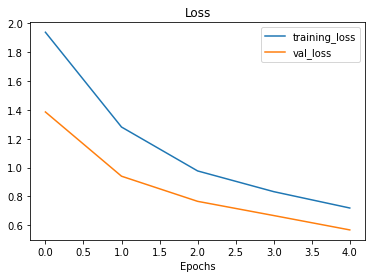

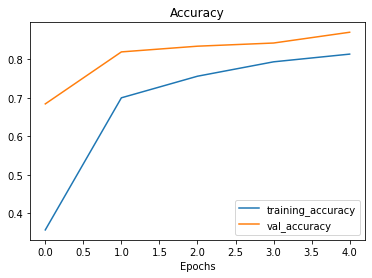

In [ ]:
plot_loss_curves(history_02)

In [ ]:
# model_00.evaluate(test_data)

In [ ]:
# model_01.evaluate(test_data)

In [ ]:
model_data_aug_10p = model_02.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.6236 - accuracy: 0.8420


In [ ]:
model_02.load_weights(checkpoint_path)

In [ ]:
reloaded_02 = model_02.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.6236 - accuracy: 0.8420


In [ ]:
model_data_aug_10p

[0.6235701441764832, 0.8420000076293945]

In [ ]:
reloaded_02

[0.6235701441764832, 0.8420000076293945]

# Fine Tuning an already existing model on 10% data


Fine tuning usually works best on a feature extraction model which is trained on large custom data.

In [ ]:
for layer in model_02.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fc88c99dcd0> True
<keras.engine.sequential.Sequential object at 0x7fc880a783d0> True
<keras.engine.functional.Functional object at 0x7fc88c923190> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fc880c1b730> True
<keras.layers.core.dense.Dense object at 0x7fc8809c7b50> True


In [ ]:
for i , layer in enumerate(model_02.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
# base_model.trainable = True

# # Freeze all layers except for the
# for layer in base_model.layers[:-10]:
#   layer.trainable = False

In [ ]:
base_model.trainable = False

for layer in base_model.layers[-10:]:
  layer.trainable = True

In [ ]:
for i , layer in enumerate(model_02.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 tf.math.truediv_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
len(model_02.trainable_variables)

2

In [ ]:
model_02.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = "accuracy"
)

In [ ]:
len(model_02.trainable_variables)

2

In [ ]:
initial_epochs = 5

In [ ]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_02.fit(train_data_10p,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_02.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name expe

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230205-123126
Epoch 5/10
24/24 [==============================] - 16s 434ms/step - loss: 0.6655 - accuracy: 0.8467 - val_loss: 0.5894 - val_accuracy: 0.8586
Epoch 6/10
24/24 [==============================] - 10s 392ms/step - loss: 0.6458 - accuracy: 0.8520 - val_loss: 0.5989 - val_accuracy: 0.8503
Epoch 7/10
24/24 [==============================] - 9s 362ms/step - loss: 0.6394 - accuracy: 0.8507 - val_loss: 0.5895 - val_accuracy: 0.8536
Epoch 8/10
24/24 [==============================] - 8s 331ms/step - loss: 0.6389 - accuracy: 0.8613 - val_loss: 0.5639 - val_accuracy: 0.8668
Epoch 9/10
24/24 [==============================] - 9s 365ms/step - loss: 0.6273 - accuracy: 0.8400 - val_loss: 0.5510 - val_accuracy: 0.8618
Epoch 10/10
24/24 [==============================] - 8s 297ms/step - loss: 0.6330 - accuracy: 0.8453 - val_loss: 0.5470 - val_accuracy: 0.8569


In [ ]:
model_data_aug_10p

[0.6235701441764832, 0.8420000076293945]

In [ ]:
model_data_aug_10p_ft = model_02.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.5888 - accuracy: 0.8476


In [ ]:
def compare_histories(initial_history, new_history, initial_epochs = 5):
  acc = initial_history.history["accuracy"]
  loss = initial_history.history["loss"]

  val_loss = initial_history.history["val_loss"]
  val_acc = initial_history.history["val_accuracy"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  print(len(total_acc))
  print(total_acc)

  plt.figure(figsize=(8,8))

  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "training_accuracy")
  plt.plot(total_val_acc, label = "validation_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim() , label = "start_fine_tuning")

  plt.legend(loc = "lower right")
  plt.title("Accuracy curves")

  plt.subplot(2,1,2)
  plt.plot(total_loss, label = "training_loss")
  plt.plot(total_val_loss, label = "validation_loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim() , label = "start_fine_tuning")
  plt.xlabel("epochs")
  plt.legend(loc = "upper right")
  plt.title("Loss curves")
  plt.show()
  

11
[0.35733333230018616, 0.699999988079071, 0.7559999823570251, 0.7933333516120911, 0.8133333325386047, 0.846666693687439, 0.8519999980926514, 0.8506666421890259, 0.8613333106040955, 0.8399999737739563, 0.8453333377838135]


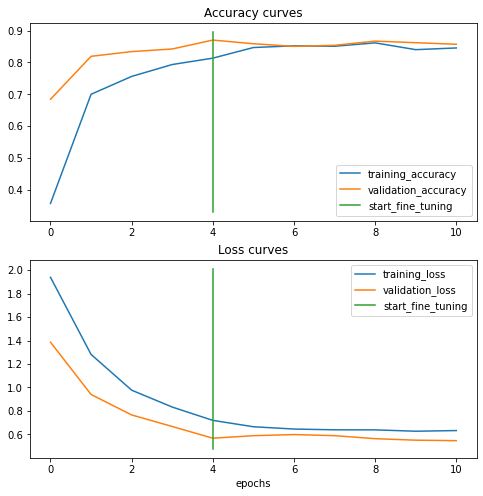

In [ ]:
compare_histories(history_02, history_fine_10_percent_data_aug)

In [ ]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-02-05 12:32:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  40.1MB/s    in 13s     

2023-02-05 12:32:51 (38.5 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_data_aug_10p_ft

[0.5888469815254211, 0.847599983215332]

In [ ]:
model_02.load_weights(checkpoint_path)

In [ ]:
model_02.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.6236 - accuracy: 0.8420


[0.6235700845718384, 0.8420000076293945]

In [ ]:
model_02.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = "accuracy"
)

In [ ]:
history_full_data_aug = model_02.fit(
    train_data_10_classes_full,
    epochs = initial_epochs + 5,
    steps_per_epoch = len(train_data_10_classes_full),
    validation_data = test_data,
    validation_steps = int(0.25 * len(test_data)),
    initial_epoch = history_02.epoch[-1], # history of feature extraction model 
    callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",experiment_name = "fine_tuned_full_data")]
)

Saving TensorBoard log files to: transfer_learning/fine_tuned_full_data/20230205-123517
Epoch 5/10
235/235 [==============================] - 66s 254ms/step - loss: 0.8209 - accuracy: 0.7679 - val_loss: 0.5767 - val_accuracy: 0.8487
Epoch 6/10
235/235 [==============================] - 53s 223ms/step - loss: 0.7638 - accuracy: 0.7736 - val_loss: 0.5385 - val_accuracy: 0.8553
Epoch 7/10
235/235 [==============================] - 50s 209ms/step - loss: 0.7197 - accuracy: 0.7867 - val_loss: 0.4714 - val_accuracy: 0.8766
Epoch 8/10
235/235 [==============================] - 45s 190ms/step - loss: 0.6877 - accuracy: 0.7955 - val_loss: 0.4660 - val_accuracy: 0.8701
Epoch 9/10
235/235 [==============================] - 42s 176ms/step - loss: 0.6616 - accuracy: 0.8031 - val_loss: 0.4602 - val_accuracy: 0.8586
Epoch 10/10
235/235 [==============================] - 41s 173ms/step - loss: 0.6465 - accuracy: 0.8065 - val_loss: 0.4267 - val_accuracy: 0.8750


In [ ]:
results_fine_tuned_full = model_02.evaluate(test_data)
results_fine_tuned_full

79/79 [==============================] - 6s 70ms/step - loss: 0.4313 - accuracy: 0.8784


[0.4313288927078247, 0.8784000277519226]

In [ ]:
model_data_aug_10p_ft

[0.5888469815254211, 0.847599983215332]

11
[0.35733333230018616, 0.699999988079071, 0.7559999823570251, 0.7933333516120911, 0.8133333325386047, 0.7678666710853577, 0.7735999822616577, 0.7866666913032532, 0.7954666614532471, 0.8030666708946228, 0.8065333366394043]


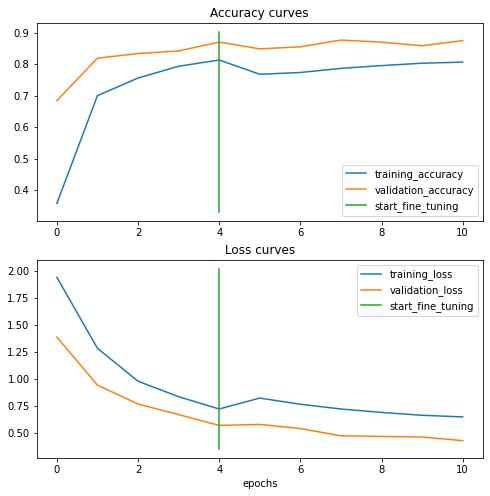

In [ ]:
compare_histories(history_02, history_full_data_aug)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Tensorflow models with 10 food101 data sets" \
  --description "Testing the effect of the amount of data on model accuracy and fine tuning above feature extraction model" \
  --one_shot 


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=RsoMlS0ZySMruu1kbCjofU6KfjF9ix&prompt=consent&access_type=o

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/QN3C4DcnRtWi3wnlRzY21g/
	Name                 Tensorflow models with 10 food101 data sets
	Description          Testing the effect of the amount of data on model accuracy and fine tuning above feature extraction model
	Id                   QN3C4DcnRtWi3wnlRzY21g
	Created              2023-02-05 12:49:54 (12 minutes ago)
	Updated              2023-02-05 12:50:01 (12 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              168
	Tensor bytes         0
	Binary object bytes  4406830
Total: 1 experiment(s)


In [ ]:
# !tensorboard dev delete --experimentid "" #id of experiment to delete